# Logistic Regression

Бұл жаттығуда сіз логистикалық регрессияны жүзеге асырасыз және оны екі түрлі деректер жиынына қолданасыз.


<a name="1"></a>
## 1 - Packages

Алдымен, осы тапсырма кезінде қажет болатын барлық бумаларды импорттау үшін төмендегі ұяшықты іске қосайық.
- [numpy](www.numpy.org) — Python көмегімен ғылыми есептеулерге арналған іргелі пакет.
- [matplotlib](http://matplotlib.org) — Python тілінде графиктерді салуға арналған әйгілі кітапхана.
- ``utils.py`` бұл тапсырма үшін көмекші функцияларды қамтиды. Бұл файлдағы кодты өзгерту қажет емес.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

Жаттығудың осы бөлігінде студенттің университетке түсу-қабылдамауын болжау үшін логистикалық регрессия үлгісін құрасыз.

<a name="2.1"></a>
### 2.1 Мәселе туралы мәлімдеме

Сіз университет бөлімінің әкімшісісіз делік және сіз әрбір талапкердің екі емтихандағы нәтижелеріне қарай оқуға түсу мүмкіндігін анықтағыңыз келеді делік.
* Сізде логистикалық регрессия үшін оқу жинағы ретінде пайдалануға болатын алдыңғы үміткерлердің тарихи деректері бар.
* Әрбір оқу үлгісі үшін сізде екі емтихандағы үміткердің ұпайлары және қабылдау туралы шешім бар.
* Сіздің міндетіңіз – осы екі емтиханның ұпайлары негізінде үміткердің оқуға түсу ықтималдығын бағалайтын жіктеу үлгісін құру.

<a name="2.2"></a>
### 2.2 Деректерді жүктеу және визуализациялау


-  `load_dataset()` көрсетілген функция деректерді айнымалыларға жүктейді

 `X_train` and `y_train`
  - `X_train` студентке арналған екі емтихан бойынша емтихан ұпайларын қамтиды
  - `y_train` қабылдау туралы шешім болып табылады
      - `y_train = 1` егер студент қабылданған болса
      - `y_train = 0` егер студент қабылданбаған болса
  -  `X_train` and `y_train` сандық массивтер болып табылады.


In [2]:
# деректер жинағын жүктеңіз
X_train, y_train = load_data("scores.txt")

#### Деректеріңізді визуализациялаңыз

Кез келген оқыту алгоритмін енгізуді бастамас бұрын, мүмкін болса, деректерді визуализациялау әрқашан жақсы.
- Төмендегі код 2D сызбасындағы деректерді көрсетеді (төменде көрсетілгендей), мұнда осьтер емтиханның екі ұпайы болып табылады, ал оң және теріс мысалдар әртүрлі маркерлермен көрсетіледі.
- Бұл сюжетті құру үшін ``utils.py`` файлындағы көмекші функцияны қолданамыз.



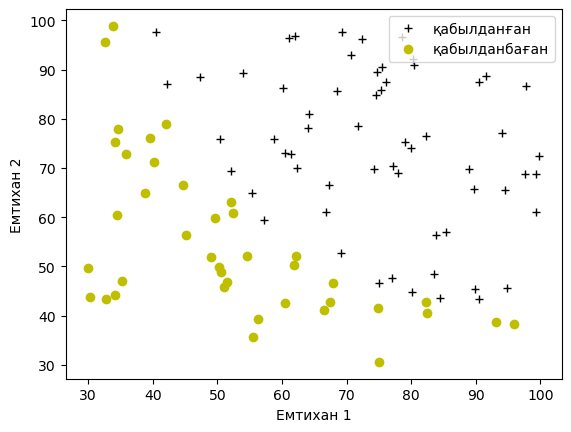

In [3]:
# Сюжетті мысалдар
plot_data(X_train, y_train[:], pos_label="қабылданған", neg_label="қабылданбаған")

# Set the y-axis label
plt.ylabel('Емтихан 2')
# Set the x-axis label
plt.xlabel('Емтихан 1')
plt.legend(loc="upper right")
plt.show()

Сіздің мақсатыңыз осы деректерге сәйкес келетін логистикалық регрессия үлгісін құру.
- Бұл модельдің көмегімен сіз жаңа студенттің екі емтихандағы ұпайларына қарай қабылданатынын болжай аласыз.

### 2.3  Sigmoid function

Еске салайық, логистикалық регрессия үшін модель ретінде ұсынылған:

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
мұндағы $g$ функциясы сигма тәрізді функция. Сигма тәрізді функция былай анықталады:

$$g(z) = \frac{1}{1+e^{-z}}$$

Алдымен сигма тәрізді функцияны жүзеге асырайық, сондықтан оны осы тапсырманың қалған бөлігі пайдалана алады.

<a name='ex-01'></a>
### 1-тапсырма
Есептеу үшін «сигмоид» функциясын орындаңыз

$$g(z) = \frac{1}{1+e^{-z}}$$

Ескертіп қой
- `z` әрқашан жалғыз сан емес, сонымен қатар сандар массиві болуы мүмкін.
- Егер кіріс сандар массиві болса, біз сигма тәрізді функцияны кіріс массивіндегі әрбір мәнге қолданғымыз келеді.

Кептеліп қалсаңыз, орындауға көмектесу үшін төмендегі ұяшықтан кейін берілген кеңестерді тексеруге болады.

In [4]:
import numpy as np

def sigmoid(z):
    """
    z-тің сигма тәрізді мәнін есептеу

    Args:
    z (ndarray or scalar): Кез келген өлшемдегі скаляр немесе сандық массив.

    Қайтару:
    g (ndarray or scalar): z мәнінің сигма тәрізді функциясы қолданылған нәтижесі.
    """
    g = 1 / (1 + np.exp(-z))  # Сигма функциясының формуласы
    return g


Аяқтаған кезде, төмендегі ұяшықтағы `sigmoid(x)` деп қоңырау шалу арқылы бірнеше мәндерді тексеріп көріңіз.
- х-тің үлкен оң мәндері үшін сигма тәрізді 1-ге жақын болуы керек, ал үлкен теріс мәндер үшін сигма тәрізді 0-ге жақын болуы керек.
- `sigmoid(0)` мәнін бағалау сізге дәл 0,5 береді.

In [5]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


### 2.4 Логистикалық регрессияға арналған шығындар функциясы

Бұл бөлімде логистикалық регрессия үшін шығындар функциясын орындайсыз.

### 2-тапсырма

Төмендегі теңдеулерді пайдаланып, 'compute_loss' функциясын аяқтаңыз.

Естеріңізге сала кетейік, логистикалық регрессия үшін шығындар функциясы формада болады

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m – деректер жиынындағы оқыту мысалдарының саны


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ бір деректер нүктесінің құны (loss) болып табылады, ол -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ модельдің болжамы болып табылады, $y^{(i)}$, бұл нақты белгі

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ мұндағы $g$ функциясы сигма тәрізді функция.

  Алдымен аралық айнымалыны есептеу пайдалы болуы мүмкін:
  $$
  z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b = w_0\,x_0^{(i)} + \cdots + w_{n-1}\,x_{n-1}^{(i)} + b,
  $$
  мұндағы \(n\) - есептеу алдында мүмкіндіктер саны
  $$
  f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g\Bigl(z_{\mathbf{w},b}(\mathbf{x}^{(i)})\Bigr).
  $$

Ескерту:
* Мұны істеп жатқанда, `X_train` және `y_train` айнымалылары скаляр мәндер емес, сәйкесінше пішін матрицалары ($m, n$) және ($𝑚$,1) екенін есте сақтаңыз, мұндағы $𝑛$ — мүмкіндіктер саны және $𝑚$ — жаттығу мысалдарының саны.
* Осы бөлік үшін жоғарыда іске асырған сигма тәрізді функцияны пайдалануға болады.

Кептеліп қалсаңыз, орындауға көмектесу үшін төмендегі ұяшықтан кейін берілген кеңестерді тексеруге болады.

In [43]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b, lambda_=1):
    m, n = X.shape  
    cost = 0  
    
    for i in range(m):
        z = np.dot(w.T, X[i].reshape(-1, 1)) + b  # `w.T` және `X[i]` өлшемдерін туралау
        f_wb = sigmoid(z).item()  # (1,1) → скаляр түріне айналдыру
        cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)  
    
    total_cost = cost / m  
    return total_cost


$w$ параметрлерін екі түрлі инициализациялау арқылы 'compute_cost' функциясының орындалуын тексеру үшін төмендегі ұяшықтарды іске қосыңыз.

In [44]:
m, n = X_train.shape

# w нөлге дейін инициализацияланған құнын есептеу және көрсету
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Бастапқы құны (нөл): {:.3f}'.format(cost))

Бастапқы құны (нөл): 0.693


### 2.5 Логистикалық регрессия үшін градиент

Осы бөлімде сіз логистикалық регрессия үшін градиентті жүзеге асырасыз.

Градиенттік түсу алгоритмін еске түсірейік:

$$\begin{align*}
& \text{қатарласу орын алғанға дейін қайталау:} \; \lbrace \newline
\; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       
\; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  
\; & \text{мұнда j := 0..n-1}\newline
& \rbrace
\end{align*}$$

мұнда, параметрлер $b$, $w_j$ барлығы бір уақытта жаңартылады.

Міне, `compute_gradient` функциясы, ол төмендегі (2) және (3) теңдеулерінен $\frac{\partial J(\mathbf{w},b)}{\partial w}$ және $\frac{\partial J(\mathbf{w},b)}{\partial b}$ мәндерін есептейді.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

* \(m\) — деректер жиынтығындағы оқыту үлгілерінің саны

* $$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) $$ — модельдің болжамы, ал $$ y^{(i)} $$ — нақты белгі (label).


- **Ескерту**: Бұл градиент сызықтық регрессияның градиентіне ұқсас көрінгенімен, формула шын мәнінде әртүрлі, себебі сызықтық және логистикалық регрессиядағы $$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) $$ анықтамалары өзгеше.

In [45]:
def compute_gradient(X, y, w, b, lambda_=None):
    """
    Логистикалық регрессия үшін градиентті есептейді

    Аргументтер:
      X : (ndarray Өлшемі (m,n)) айнымалы, мысалы, үйдің ауданы
      y : (array_like Өлшемі (m,1)) нақты мән (белгі)
      w : (array_like Өлшемі (n,1)) модель параметрлерінің мәндері
      b : (скаляр)                 модель параметрінің мәні
      lambda_: пайдаланылмайтын параметр (орын сақтаушы).

    Нәтиже:
      dj_dw: (array_like Өлшемі (n,1)) w параметрлеріне қатысты шығынның градиенті.
      dj_db: (скаляр)                 b параметріне қатысты шығынның градиенті.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)  # Модельдің болжамы
        err_i  = f_wb_i  - y[i]               # Қателік
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]  # w бойынша градиентті есептеу
        dj_db = dj_db + err_i  # b бойынша градиентті есептеу

    dj_dw = dj_dw/m  # Орташа мәнін есептеу
    dj_db = dj_db/m


    return dj_db, dj_dw


$w$ параметрлерінің екі түрлі инициализациясымен 'compute_gradient' функциясының орындалуын тексеру үшін төмендегі ұяшықтарды іске қосыңыз.

In [46]:
# w нөлге дейін инициализацияланған градиентті есептеңіз және көрсетіңіз
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db бастапқы w (нөлдер):{dj_db}' )
print(f'dj_dw бастапқы w (нөлдер):{dj_dw.tolist()}' )

dj_db бастапқы w (нөлдер):-0.1
dj_dw бастапқы w (нөлдер):[-12.00921658929115, -11.262842205513591]


### 2.6 Градиенттің түсуі арқылы параметрлерді үйрену

Алдыңғы тапсырмаға ұқсас, енді градиенттің түсуін пайдалану арқылы логистикалық регрессия үлгісінің оңтайлы параметрлерін табасыз.
- Бұл бөлік үшін ештеңені жүзеге асырудың қажеті жоқ. Төмендегі ұяшықтарды жай ғана іске қосыңыз.

- Градиент түсуінің дұрыс жұмыс істеп тұрғанын тексерудің жақсы жолы - қарау
$J(\mathbf{w},b)$ мәнінде және әр қадам сайын оның азаюын тексеріңіз.

- Егер сіз градиентті енгізіп, шығынды дұрыс есептедіңіз деп есептесеңіз, сіздің $J(\mathbf{w},b)$ мәні ешқашан өспеуі керек және алгоритмнің соңына қарай тұрақты мәнге жақындауы керек.

In [47]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Пакеттік градиентті түсу әдісі арқылы параметрлерді үйрену.
    Параметрлерді жаңарту үшін num_iters рет градиенттік қадамдар жасайды,
    оқыту жылдамдығы alpha арқылы реттеледі.

    Аргументтер:
      X :    (array_like Өлшемі (m, n))  Кіріс деректері (m үлгі, n ерекшелік)
      y :    (array_like Өлшемі (m,))    Нақты мәндер (белгілер)
      w_in : (array_like Өлшемі (n,))    Модель параметрлерінің бастапқы мәндері
      b_in : (скаляр)                    Модельдің бастапқы ығысу (bias) мәні
      cost_function:                      Шығынды есептеу функциясы
      alpha : (float)                     Оқыту жылдамдығы
      num_iters : (int)                    Градиентті түсу әдісінің қайталану саны
      lambda_ (скаляр, float)              Регуляризация коэффициенті

    Нәтиже:
      w : (array_like Өлшемі (n,)) Градиентті түсу аяқталғаннан кейінгі жаңартылған параметр мәндері
      b : (скаляр)                Градиентті түсу аяқталғаннан кейінгі жаңартылған ығысу мәні
    """

    # Оқыту үлгілерінің саны
    m = len(X)

    # Әр итерациядағы шығын мәндерін және w параметрлерін сақтау үшін массивтер
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Градиентті есептеу және параметрлерді жаңарту
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Параметрлерді жаңарту (w, b, alpha және градиент арқылы)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Әр итерациядағы шығын мәнін сақтау
        if i < 100000:  # Ресурстардың шамадан тыс пайдаланылуын болдырмау
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Әр 10%-да немесе соңғы итерацияда шығынды шығару
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Итерация {i:4}: Шығын {float(J_history[-1]):8.2f}")

    return w_in, b_in, J_history, w_history  # w, J және w тарихын графикке түсіру үшін қайтарады


Енді деректер жиынының параметрлерін білу үшін жоғарыдағы градиентті түсіру алгоритмін іске қосайық.

**Ескерту**

Төмендегі код блогын іске қосу бірнеше минутты алады, әсіресе векторланбаған нұсқада. Жүзеге асыруды тексеру және тезірек қайталау үшін «итерацияларды» қысқартуға болады. Уақытыңыз болса, жақсы нәтижелерге қол жеткізу үшін 100 000 итерацияны орындап көріңіз.

In [52]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Кейбір градиент түсіру параметрлері
iterations = 100
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Итерация    0: Шығын     0.96
Итерация   10: Шығын     0.31
Итерация   20: Шығын     0.31
Итерация   30: Шығын     0.31
Итерация   40: Шығын     0.31
Итерация   50: Шығын     0.31
Итерация   60: Шығын     0.31
Итерация   70: Шығын     0.31
Итерация   80: Шығын     0.31
Итерация   90: Шығын     0.31
Итерация   99: Шығын     0.31


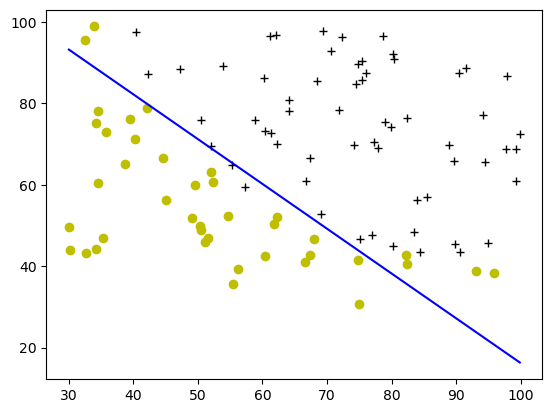

In [53]:
plot_decision_boundary(w, b, X_train, y_train)

<a name='ex-04'></a>
### 3-тапсырма

`predict` функциясын аяқтаңыз, ол берілген деректер жинағы мен үйренген параметр векторлары $w$ және $b$ негізінде `1` немесе `0` болжамдарын шығарады.  
- Алдымен, әрбір үлгі үшін модельдің болжамын есептеу керек:  
  $$f(x^{(i)}) = g(w \cdot x^{(i)})$$  
  - Мұны сіз жоғарыдағы бөлімдерде жүзеге асырдыңыз.  
- Модельдің шығысын ($f(x^{(i)})$) $x^{(i)}$ берілген кезде $y^{(i)}=1$ болуының ықтималдығы ретінде түсіндіреміз, мұнда параметрлер $w$ арқылы берілген.  
- Сондықтан, логистикалық регрессия моделінен қорытынды болжамды ($y^{(i)}=0$ немесе $y^{(i)}=1$) алу үшін келесі эвристиканы қолдануға болады:  

  Егер  
  $$f(x^{(i)}) \geq 0.5$$  
  болса, онда $y^{(i)}=1$ деп болжау керек.  

  Егер  
  $$f(x^{(i)}) < 0.5$$  
  болса, онда $y^{(i)}=0$ деп болжау керек.  

Егер қиындық туындаса, төмендегі ұяшықтан кейін берілген кеңестерді қарастырып, іске асыруға көмектесе аласыз.

In [60]:
import numpy as np

def predict(X, w, b):
    """
    Логистикалық регрессия параметрлерін қолданып, 0 немесе 1 деп болжайды.

    Аргументтер:
    X : (ndarray Өлшемі (m, n))  Кіріс деректері
    w : (array_like Өлшемі (n,))  Модель параметрлері
    b : (скаляр, float)            Модельдің ығысу параметрі

    Нәтиже:
    p: (ndarray (m,))
       0.5 шегіне негізделген болжамдар
    """

    # 1. Сызықтық комбинацияны есептеу: z = w * X + b
    z = np.dot(X, w) + b  

    # 2. Сигмоид функциясын қолдану
    f_wb = sigmoid(z)

    # 3. Шекті 0.5 мәнімен салыстырып, 0 немесе 1 беру
    p = (f_wb >= 0.5).astype(int)  

    return p


Now let's use this to compute the accuracy on the training set

In [61]:
def compute_accuracy(y_true, y_pred):
    """
    Екілік классификация үшін дәлдікті (accuracy) есептейді.

    Аргументтер:
    y_true : (array_like, өлшемі (m,)) Нақты белгілер (0 немесе 1)
    y_pred : (array_like, өлшемі (m,)) Болжанған белгілер (0 немесе 1)

    Нәтиже:
    accuracy : (float) Дәлдік, пайызбен (0-100%)
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # дәлдігін есептеу
    accuracy = np.mean(y_true == y_pred) * 100
    return accuracy

# Қолдану мысалы
# y_actual - нақты белгілер, y_predicted - модельдің болжамдары
y_predicted = predict(X_train, w, b)

# Ensure y_train is properly formatted
y_train = np.array(y_train).flatten()

accuracy = compute_accuracy(y_train, y_predicted)
print(f"Модельдің дәлдігі: {accuracy:.2f}%")


Модельдің дәлдігі: 92.00%


2 емтиханнан 50, 50 алсам. қабылдана аламын ба?

In [64]:
import numpy as np

# Берілген мысал
example = np.array([50, 50]).reshape(1, -1)  # (1, n) өлшеміне келтіру

# Модель көмегімен болжам жасау
prediction = predict(example, w, b)

# Нәтижені шығару
print(f"2 емтиханнан 50, 50 алсам. қабылдау нәтижесі: {prediction[0]}")


2 емтиханнан 50, 50 алсам. қабылдау нәтижесі: [0]
